In [1]:
import numpy as np
from numpy import random

In [2]:
#----------------------#
#  display LHS points  #
#----------------------#
def display_pts ( pts ):
    p=3
    for x in pts:
        for xi in x:
            print(xi,end=" ")
        print("\n",end="")

In [3]:
#--------------------#
#  build LHS points  #
#--------------------#
def lhs ( n, p, lb, ub ):

    print("LHS(n=",n,",p=",p,")",sep="")

    # init list of p points:
    x=n*[0.0]
    pts=[]

    # indexes (permutations for each dimension):
    indexes=[]
    for i in range(n):
        indexes.append(np.arange(p))
        random.shuffle(indexes[i])

    # the sampling (p points):
    for k in range(p):
        for i in range(n):
            w=(ub[i]-lb[i])/p
            #print("w=",w)
            min=lb[i]+indexes[i][k]*w
            #print("min=",min)
            max=lb[i]+(indexes[i][k]+1)*w
            #print("max=",max)
            x[i]=(max - min) * np.random.random_sample() + min
        pts.append(x.copy())
    
    return pts


In [4]:
# LHS in 2D:
# ----------
n=2
p=10
lb=[0.0, 0.0]
ub=[6.0, 6.0]
pts=lhs(n,p,lb,ub)
display_pts(pts)


LHS(n=2,p=10)
4.614797009922084 1.2095307153416361 
3.9860682237992293 2.5192298883791735 
5.595536893791117 0.9307784403635431 
0.25344549026651475 4.214229443305765 
5.307205132484986 4.113364223249091 
0.7415252084175044 4.836067872617662 
2.1051828484757973 0.29722927187634013 
2.5079156426476947 3.539741642696648 
3.274992340596124 2.063937308864526 
1.793486812851556 5.8448237620368 


LHS(n=2,p=100)
x in [0.9987711276875038,99.76628043547262]
y in [0.023223746361062725,99.60364145063738]


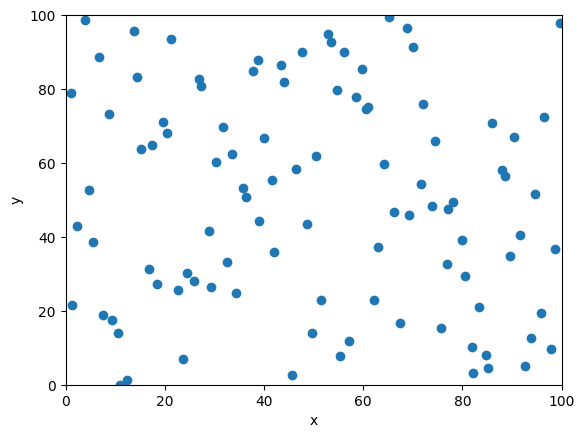

In [6]:
# Plot LHS points in 2D:
# ----------------------
import matplotlib.pyplot as plt

n=2
p=100

pts=lhs(n,p,n*[0.0],n*[100.0])

x = p*[0.0]
y = p*[0.0]

for k in range(p):
    x[k]=pts[k][0]
    y[k]=pts[k][1]

print("x in [",min(x),",",max(x),"]",sep="")
print("y in [",min(y),",",max(y),"]",sep="")

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0.0, 100.0, 0.0, 100.0])
plt.show()

LHS(n=2,p=10)
LHS(n=2,p=100)
LHS(n=2,p=1000)
LHS(n=2,p=10000)
LHS(n=2,p=100000)


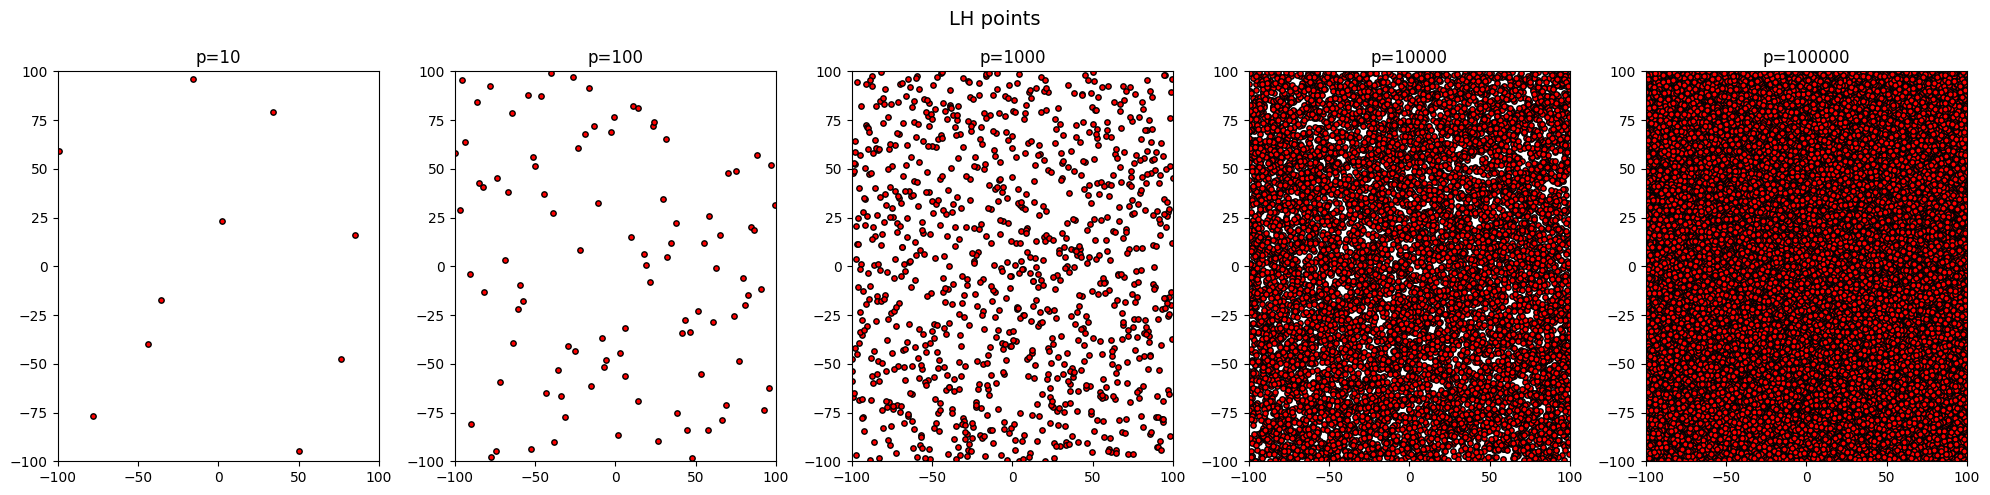

In [7]:
# Plot LHS points in 2D (with several values of p):
# -------------------------------------------------
import matplotlib.pyplot as plt

n=2
lb=-100
ub= 100


fig,ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i in range(5):
    p=pow(10,i+1)

    pts=lhs(n,p,n*[lb],n*[ub])

    x = p*[0.0]
    y = p*[0.0]

    for k in range(p):
        x[k]=pts[k][0]
        y[k]=pts[k][1]

    ax[i].set_title("p="+str(p))
    ax[i].set_xlim(lb,ub)
    ax[i].set_ylim(lb,ub)

    ax[i].scatter(x,y,color='red',edgecolor='black',s=15)

fig.suptitle("LH points", fontsize=14)
fig.tight_layout()

plt.show()



In [8]:
# For SOLAR6 (not the "official" 30 LHS starting points):
n=5
p=30

lb=[ 793.0,  2.0,  2.0, 0.01, 0.01 ]
ub=[ 995.0, 50.0, 30.0, 5.00, 5.00 ]

# different seed each time:
random.seed()

pts=lhs(n,p,lb,ub)
display_pts(pts)

LHS(n=5,p=30)
985.2742341166029 27.725531682032273 28.310814839963463 2.2802197196686653 4.756246977116274 
876.9611149562243 11.188250214737558 14.357741613813808 2.5329470562471395 4.901914554762027 
922.1185583170485 13.42896401973846 22.3097486692458 0.11137237395395373 0.9773028730462465 
903.3364084927995 44.20628981567328 2.204489113881542 2.7875219238818776 1.9428034835822623 
933.3368128215205 48.43186109637216 25.172468969787854 0.1910581070726569 4.208013459100161 
835.2558096362756 35.29926975607249 29.239230873787182 2.922330531063296 2.4615233663921248 
794.0523620384039 35.80705285680913 15.332403450336313 1.7030148750066532 1.3179824474824802 
989.095246433311 32.70437117047536 20.349041248270606 2.1206612331122385 3.4154162047659717 
964.7784075578201 24.93870152007096 26.41054750620675 4.02624355888343 0.7982678960399893 
870.6022314593027 15.877844437837672 11.418976425915771 4.973750613246505 1.6939516708699338 
829.014368042076 31.43248221651104 7.2811382788618895 

In [9]:
# For SOLAR10: the "official" 30 LHS starting points:
n=5
p=30
lb=[ 793.0,  2.0,  2.0, 0.01, 0.01 ]
ub=[ 995.0, 50.0, 30.0, 5.00, 5.00 ]

# fixed random seed:
random.seed(0)

pts=lhs(n,p,lb,ub)
display_pts(pts)

LHS(n=5,p=30)
810.8243058772629 11.346217790715768 24.64708148666455 4.234504185208851 1.4326193061546326 
982.6439324322953 28.191692948397346 27.33667897854717 1.1027465281852433 3.952721634121889 
882.4757413427934 34.69326089917127 22.305699580940708 1.739217679812086 4.65004105178901 
864.6354019132908 13.026487099561084 25.968051864832518 3.744049890456989 1.0044356310939793 
968.8490928580567 24.027237925693964 15.451032129700522 2.9500147005063053 4.043549447183945 
956.7090034351028 16.344665952831882 13.7492340793975 1.2840581792075456 2.593689973568136 
976.3522556916092 20.231790869520367 20.3108879936186 4.080986296729687 1.086198654146209 
871.8882351769395 21.66078560698125 23.82456474336595 0.4672785829130699 2.1521158809825813 
908.1592799485359 5.3477982231374375 29.39711021794489 3.095785437769165 4.672926307218639 
947.6576758860858 42.513595586197596 17.139845172838196 1.8631635628526741 4.849844234534841 
833.2925510918519 44.01654548413985 2.501221019950728 3.577